In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [4]:
data = pd.read_csv('/Users/tanishqsharma/Desktop/JupyterProject/data/Symptom2Disease.csv')

In [5]:
labels = data['label']  # Contains the labels or categories associated with the text data
symptoms = data['text']  # Contains the textual data (e.g., symptoms, sentences) for analysis

In [6]:
stop_words = set(stopwords.words('english'))

In [7]:
def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text.lower())
    # Removing stopwords and non-alphabetic characters
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

In [11]:
preprocessed_symptoms = symptoms.apply(preprocess_text)

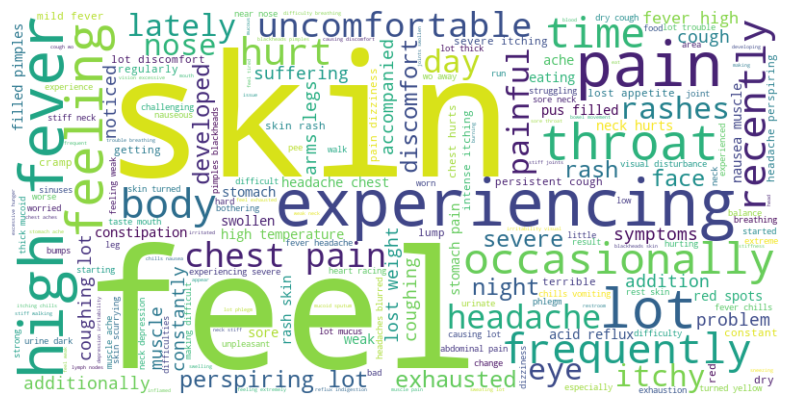

In [42]:
all_text = ' '.join([' '.join(tokens) for tokens in preprocessed_symptoms])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


# Plotting Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

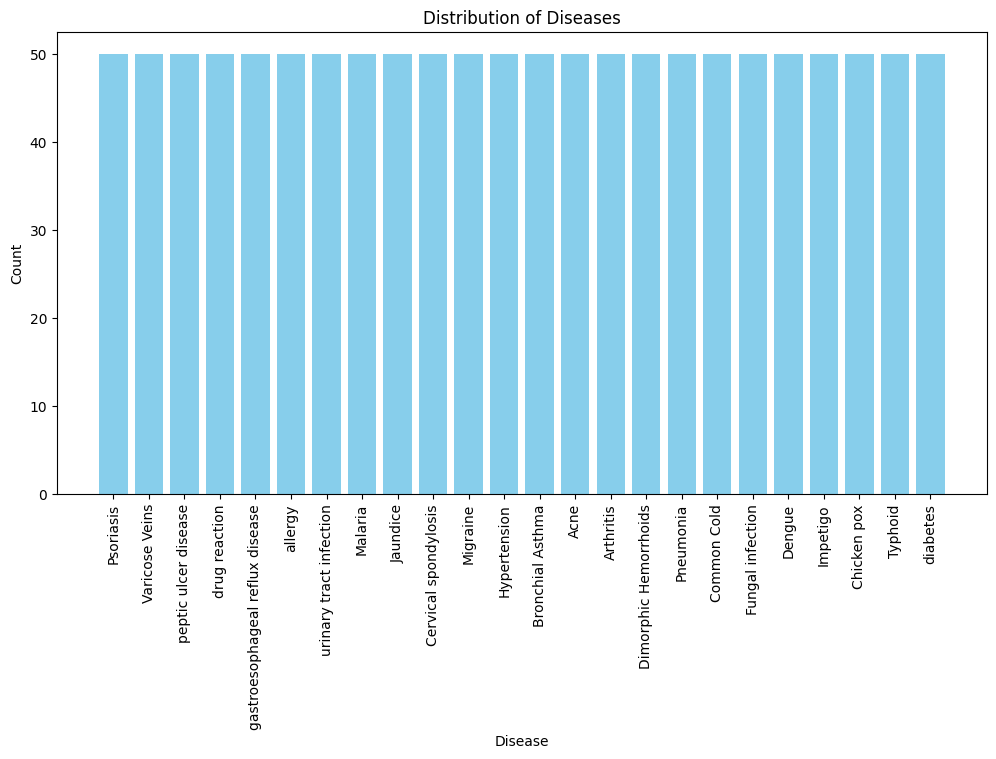

In [17]:

import matplotlib.pyplot as plt

# Count the occurrences of each disease
disease_counts = data['label'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(12, 6))
plt.bar(disease_counts.index, disease_counts.values, color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Distribution of Diseases')
plt.xticks(rotation=90)
plt.show()

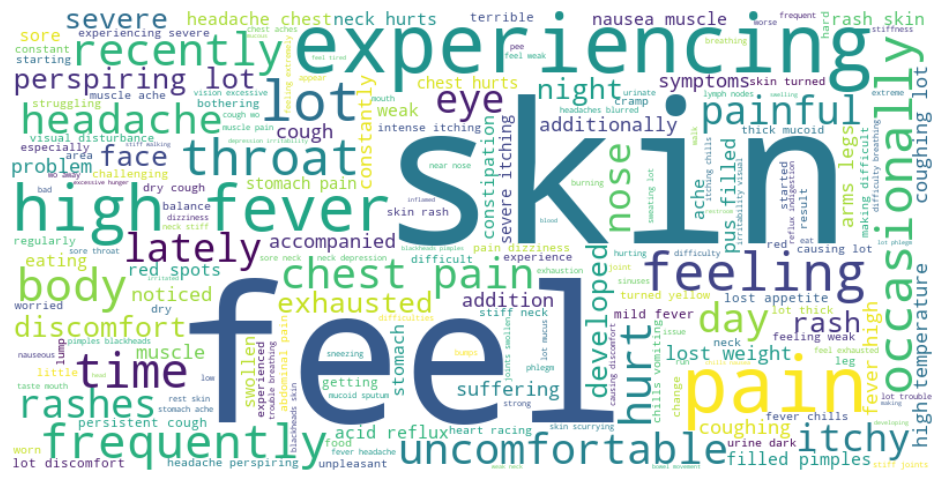

In [43]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display it
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [' '.join(tokens) for tokens in preprocessed_symptoms]

tfidf_vectorizer = TfidfVectorizer(max_features=1500)
tfidf_features = tfidf_vectorizer.fit_transform(corpus).toarray()


In [13]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(tfidf_features, labels, test_size=0.2, random_state=42)

In [14]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) based on your dataset
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
predictions = knn_classifier.predict(X_test)

In [16]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.32555224, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(240, 1356))

In [22]:
# Example Usage
symptom = "high fever"

# Preprocess the symptom into tokens
preprocessed_symptom = preprocess_text(symptom)

# Join the tokens into a single string
symptom_text = ' '.join(preprocessed_symptom)

# Now transform it using the vectorizer
symptom_tfidf = tfidf_vectorizer.transform([symptom_text])


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [23]:
nlp = spacy.load("en_core_web_sm")
def preprocess_text(text):
    doc = nlp(text.lower())
    return [token.text for token in doc if token.is_alpha and not token.is_stop]

In [24]:
knn_classifier.predict(symptom_tfidf)


array(['Chicken pox'], dtype=object)